## Ref

https://www.frontiersin.org/journals/computer-science/articles/10.3389/fcomp.2019.00009/full

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

マップ作製やルート作成で使う関数を作成する

In [2]:
def generate_graph(num_nodes: int, edge_p: float) -> nx.Graph:
    """
    ランダムな連結グラフを生成する
    """
    # https://qiita.com/igenki/items/9309d2fee5e0ff7d529e を見ると用いる関数によって、生成されるグラフの性質が変わるらしい
    # TODO: 最適な関数を選択する
    while True:
        g = nx.erdos_renyi_graph(num_nodes, edge_p)
        if nx.is_connected(g) is True:
            # 必ず連結なグラフを生成する
            break
    for u, v in g.edges():
        g.edges[u, v]["weight"] = random.randint(1, 10)
    return g

In [3]:
def generate_candidate_routes(shortest_path: list[int]) -> list[list[int]]:
    """
    最短路に沿って、先頭から順にノードを追加する形で候補経路を生成する。
    例えば、[8, 9, 7, 4, 5, 6] であれば
      [8], [8, 9], [8, 9, 7], … といったリストを作成する。
    """
    candidate_routes = []
    # 1ステップ目から全体まで
    for i in range(1, len(shortest_path) + 1):
        candidate_routes.append(shortest_path[:i])
    return candidate_routes

In [4]:
def plot_graph(g: nx.Graph):
    """
    グラフを描画する
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    pos = nx.spring_layout(g)
    edge_labels = nx.get_edge_attributes(g, "weight")
    nx.draw(g, pos, with_labels=True, ax=ax)
    nx.draw_networkx_edge_labels(
        g,
        pos,
        edge_labels=edge_labels,
        ax=ax,
    )

    return fig, ax

最適化を行うグラフの生成

(<Figure size 800x600 with 1 Axes>, <Axes: >)

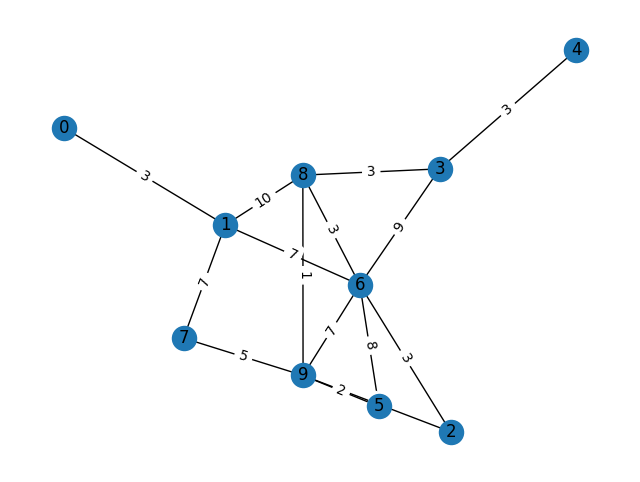

In [5]:
n_nodes = 10
p = 0.3
G = generate_graph(n_nodes, p)
plot_graph(G)

In [6]:
nodes = list(G.nodes())
start_node = random.choice(nodes)
goal_node = random.choice(nodes)
while start_node == goal_node:
    goal_node = random.choice(nodes)
shortest_path = nx.shortest_path(G, start_node, goal_node)
candidate_routes = generate_candidate_routes(shortest_path)
print(f"start: {start_node}, goal: {goal_node}")
print(f"shortest_path: {shortest_path}")
print(f"candidate_routes: {candidate_routes}")

start: 8, goal: 4
shortest_path: [8, 3, 4]
candidate_routes: [[8], [8, 3], [8, 3, 4]]
